<div class="alert alert-block" style = "background-color: black">
    <p><b><font size="+4" color="orange">Other Issues in Regression</font></b></p>
    <p><b><font size="+2" color="white">Handling Qualitative Predictors & One-Hot Encoding</font></b></p>
    </div>

---
* **Import Packages**

In [6]:
#Import Data Manipulation Packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
import scipy
from scipy import linalg
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

* **Import Data Visualization packages**

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({'font.size':12}) #sets global font size

---
<div class="alert alert-block" style="background-color: black">
    <p><b><font size="+2" color="orange">Dealing with Qualitative Predictors or Categorical Variables in Regression</font></b></p>
    </div>
    
---

Not all variables in a dataset are quantitative. This has been our assumption all along. Some predictors are qualitative or categorical, also known as factor, and these too have to be reflected in the formulation of the linear regression model. 

Let us investigate this using the **Credit dataset**.

In [8]:
Credit = pd.read_csv('../../../Data/ISLP_DATA/Credit.csv')
Credit.info()
print("\n")
Credit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB




Income  Limit  Rating  Cards  Age  Education  Own Student Married Region  \
0   14.891   3606     283      2   34         11   No      No     Yes  South   
1  106.025   6645     483      3   82         15  Yes     Yes     Yes   West   
2  104.593   7075     514      4   71         11   No      No      No   West   
3  148.924   9504     681      3   36         11  Yes      No      No   West   
4   55.882   4897     357      2   68         16   No      No     Yes  South   

   Balance  
0      333  
1      903  
2      580  
3      964  
4      331

Given the `Credit` dataset above which displays the record variables for 400 credit card holders.The **response** variable is the column titled `balance` which is the average credit card debt for each individual.

Python's method **.info** reveals the data type in each column. This shows that four of the columns do not hold numeric data but objects. 

Python's method **.head** reveals the first 5 records of the dataset. Four columns are clearly observed to be qualitative or categorical. These predictors are - `Own`(house ownership),`student`(Student status),`Married`(Marital status),`Region`(East, West or South) while the remaining six are quantitative.-`Income`(in thousands of dollars),`limit`(credit limit),`rating`(credit rating),`Cards`(Number of credit cards),`Age` and `Education`(years of education) 

---
# **1. Qualitative Predictors with Only Two possible values**
---
#### *Suppose we are interested in the relationship between credit card balances of those who own a house and those who don't* 

If a qualitative predictor has only two possible values or levels, incorporating this into the regression model is simple.

> We simply create an indicator, $x_{i}$ that takes on two possible numerical values based on `own` variable and use this variable as a predictor in the regression equation.

$$
x_{i} = 
\begin{cases}
1 & \mathit {\text{if ith person owns a house}}\\
0 & \mathit {\text{if ith person does not own a house,}}
\end{cases}
$$

Using this variable in the regression equation gives:

$$
y_{i} = \beta_{0} + \beta_{1}x_{i} + ∈_{i} = 
\begin{cases}
\beta_{0} + \beta_{1} + ∈_{i} & \mathit{\text{if the ith person owns a house}}\\
\beta_{0} + ∈_{i} & \mathit{\text{if the ith person does not}}
\end{cases}
$$

The interpretation of this expression is as follows:
> $\beta_{0}$ is regarded as the average credit card balance among those who do not own a house

> $\beta_{0} + \beta_{1}$ is regarded as the average credit card balance amomg those who own their house

> $\beta_{1}$ is the average difference in credit card balance between owners and non-owners

Let's perform the regression
* Obtain your independent, $Y$ and dependent, $X$ variables from the dataframe 

* Perform one-hot encoding to obtain dummy variables (1 & 0) for owners and non-owners respectively in a new column using the Ownership column

In [9]:
Credit['Own_10_YesNo'] = Credit.Own.str.get_dummies('No')   
X = pd.DataFrame({'Ownership Status':Credit['Own_10_YesNo']})

In [10]:
Y = Credit.Balance #Response is balance

* Use statsmodel to perform the linear regression

In [11]:
X = sm.add_constant(X)
LR_model = sm.OLS(Y,X).fit()
pred_resp_Yhat = LR_model.predict(X)
summarize(LR_model)

coef  std err       t  P>|t|
const             509.8031   33.128  15.389  0.000
Ownership Status   19.7331   46.051   0.429  0.669

### **Interpretation**

The interepretation is dependent on the coding scheme used for the dummy variables.Owners are given a code of 1 while non-owners are given a code of zero in the dummy variable, $x_{i}$. This influences the interpretation of the coeficients and that is given as follows.

The coefficients $\beta_{0}$ and $\beta_{1}$ are shown under the column coef as 509.8 and 19.73 respectively. This can be interpreted as the average credit card debt for non-owners and owners respectively in US dollars. This gives a combined total of $509.80 + $19.73 to give $529.83 

* If **owners** are given a code of 0 and the **non-owners** a code of 1. The result would be:

In [12]:
Credit['Own_01_YesNo'] = Credit.Own.str.get_dummies('Yes')   
X1 = pd.DataFrame({'Ownership Status':Credit['Own_01_YesNo']})

* Perform the Linear Regression

In [13]:
X1 = sm.add_constant(X1)
LR_model1 = sm.OLS(Y,X1).fit()
pred_resp_Y1hat = LR_model1.predict(X1)
summarize(LR_model1)

coef  std err       t  P>|t|
const             529.5362   31.988  16.554  0.000
Ownership Status  -19.7331   46.051  -0.429  0.669

The coefficients of $\beta_{0}$ and $\beta_{1}$ are $529.54 and -$19.73 respectively leading to a credit card balance of $529.54 - $19.73 = $509.80 respectively. 

Dummy variables $x_{i}$ do not necessarily have to be coded in 1 & 0. Alternatively, we could use a 1 & -1 coding scheme such that:

$$
x_{i} = 
\begin{cases}
1 & \mathit {\text{if ith person owns a house}}\\
-1 & \mathit {\text{if ith person does not own a house,}}
\end{cases}
$$

giving a regression equation of the form

$$
y_{i} = \beta_{0} + \beta_{1}x_{i} + ∈_{i} = 
\begin{cases}
\beta_{0} + \beta_{1} + ∈_{i} & \mathit{\text{if the ith person owns a house}}\\
\beta_{0} -\beta_{1} + ∈_{i} & \mathit{\text{if the ith person does not own a house}}
\end{cases}
$$

> $\beta_{0}$ can be interpreted as the overall average credit card balance regardless of house ownership status and

> $\beta_{1}$ is the amount by which house owners and non-owners have credit card balances that are above and below the average respectively.

### **Interpretation continued**
From the two one-hot encoding schemes used above (1,0) and (0,1), two sets of different values of coefficients was obtained. 

$\beta_{0}$ can now be estimated as the average of the two values obtained above i.e ($509.80 + $529.53)/2 = $519.67

$\beta_{1}$ on the other hand can be estimated as the average of $19.73 - average difference between the owners and non-owners.

The final prediction of othe credit card balances of owners and non-owners will be identical .regardless of the coding scheme used.The only difference is in the way the coefficients are interpreted.


In [14]:
import warnings
warnings.filterwarnings('ignore')

Credit['Own_-11_NoYes'] = pd.Series(np.zeros(Credit.Own.shape))
for i in range(len(Credit.Own)):
    if Credit.Own[i] == 'Yes':
        Credit['Own_-11_NoYes'][5] = 1
    elif Credit.Own[i] == 'No':
            Credit['Own_-11_NoYes'][i] = -1

* Get the independednt and dependent variables

In [15]:
X2 = pd.DataFrame({'Ownership Status':Credit['Own_-11_NoYes']})

* Perform the Regression

In [16]:
X2 = sm.add_constant(X2)
Lin_Reg_Model = sm.OLS(Y,X2).fit()
pred_response_Y2hat = Lin_Reg_Model.predict(X2)
summarize(Lin_Reg_Model)

coef  std err       t  P>|t|
const             535.1794   31.673  16.897  0.000
Ownership Status   31.7578   45.598   0.696  0.487

In all 3 cases, the p-value remains unchanged regardless of how the coding scheme was implemented - (1,0),(0,1) or (1,-1) for owners and non-owners respectively. This corroborates our earlier statement.

---
# **2. Qualitative Predictors with more than two levels**
---
When confronted with a qualitative predictor with more than two levels in a dataset, a single dummy variable cannot represent all possible values. The solution in this instance is to **create additional dummy variables**.

In the Credit dataset, one such predictor is the **region** variable with levels - **south**, **west** and **east**. There are 3 levels and there will be two dummy variables. The level with no dummy variable is the **baseline** 

These can be formulated thus:

$$
x_{i1} =
\begin{cases}
1 & \mathit {\text{if ith person is from the south}}\\
0 & \mathit {\text{if ith person is not from the south}}
\end{cases}
$$

while the second dummy variable is 

$$
x_{i2} = 
\begin{cases}
1 & \mathit {\text{if ith person is from the west}}\\
0 & \mathit {\text{if ith person is not from the west}}
\end{cases}
$$

The regression equation can then be formulated thus:

$$
y_{i} = \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + ∈_{i} = 
\begin{cases}
\beta_{0} + \beta_{1} + ∈_{i} & \mathit{\text{if the ith person is from the south}}\\
\beta_{0} + \beta_{2} + ∈_{i} & \mathit{\text{if the ith person is from the west}}\\
\beta_{0} + ∈_{i} & \mathit{\text{if the ith person is from the east}}
\end{cases}
$$


> $\beta_{0}$ can be interpreted as the average credit card balance for individuals from the East. This can only be true if both groups have equalnumber of members

> $\beta_{1}$ can be interpreted as the difference in the average balance between people from the South versus the East

> $\beta_{2}$ can be interepreted as the difference in the average balance between those from the West versus the East.

* Let's perform the regression and analyze the coefficients

* Perform one-hot encoding to create the dummy variables $x_{i1}$ and $x_{i2}$

In [17]:
Region_Dummies = Credit['Region'].str.get_dummies('East''West')
Region_Dummies

East  South  West
0       0      1     0
1       0      0     1
2       0      0     1
3       0      0     1
4       0      1     0
..    ...    ...   ...
395     0      1     0
396     1      0     0
397     0      1     0
398     0      1     0
399     0      0     1

[400 rows x 3 columns]

* Now to perform the linear Regression using the two dummy variables that includes the person in the South and the West

In [18]:
X3 = pd.DataFrame({'South pple 𝛃1':Region_Dummies['South'],'West pple 𝛃2':Region_Dummies['West']})
Y = Credit['Balance']

In [19]:
X3 = sm.add_constant(X3)
Regression_Model = sm.OLS(Y,X3).fit()
pred_response_Y3hat = Regression_Model.predict(X3)
summarize(Regression_Model)

coef  std err       t  P>|t|
const          531.0000   46.319  11.464  0.000
South pple 𝛃1  -12.5025   56.681  -0.221  0.826
West pple 𝛃2   -18.6863   65.021  -0.287  0.774

### **Interpretation**

From the regression results presented above, the coefficients for the regression model are $\beta_{0}$ - $531$ which represents the estimated balance for the baseline, East. $\beta_{1}$ - $12.50$ represents the estimate those in the South will have less than the East. $\beta_{2}$ - $18.69$ represents the estimate those in the West will have less than the East.

The p-values for the two dummy variables are quite large implying that there's no statistical evidence of a real difference in average credit card balance between South and East or between East and West.

The level selected as the baseline category is arbitrary, and the final predictions for each group will be the same regardless of this choice - East, West or South. 

But the coefficients and the p-values do depend on the choiceof the dummy variable coding but to circumvent this, we can use an **F-test** to test the null hypothesis $H_{0}: \beta_{1} = \beta_{2} = 0$ that there is no relationship between **credit card balance & region** 

In [20]:
print(round(Regression_Model.f_pvalue,2))

0.96


This F-test has a p-value of 0.96 implying that **we cannot reject the null hypothesis that there is no relationship between balance and region**.

---
## **3. Regression involving Quantitative & Qualitative Predictors**
---
We have successfully implemented the dummy variable approach on qualitative predictors. This can be extended to both quantitative and qualitative predictors with no problems.

* The following is an example to regress **balance** on both a quantitative predictor such as **income** and a qualitative variable such as **student**.

* Create the dummy variable for student, $x_{i}$

$$
x_{i} =
\begin{cases}
1 & \mathit {\text{if ith person is student}}\\
0 & \mathit {\text{if ith person is not a student}}
\end{cases}
$$

This leads to the formulation of the linear regression model

$$
y_{i} = \beta_{0} + \beta_{1}x_{i} + \beta_{2}x_{i} + ∈_{i} = 
\begin{cases}
\beta_{0} + \beta_{1} + \beta_{2} + ∈_{i} & \mathit{\text{if the ith person is a student and has income}}\\
\beta_{0} + \beta_{2} + ∈_{i} & \mathit{\text{if the ith person is not a student and has income}}
\end{cases}
$$

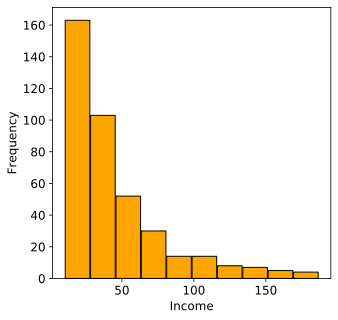

In [21]:
Credit.Income.plot.hist(figsize=(5,5),edgecolor='black',color='orange',rwidth=0.97);
plt.xlabel('Income');
#Credit[Credit.Student =='No'] & Credit[Credit['Income'] > 30.0]

* Create dummy variables for the student predictor

In [22]:
Credit['Is_student_10'] = Credit.Student.str.get_dummies('No')

* Get the independent variables

In [23]:
X4 = pd.DataFrame({'Is Student':Credit['Is_student_10'],'Income':Credit['Income']})

* Perform the Regression

In [24]:
X4 = sm.add_constant(X4)
QQ_Regression_Model = sm.OLS(Y,X4).fit()
pred_response_Y4hat = QQ_Regression_Model.predict()
QQ_Regression_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           9.64e-29
Time:                        11:02:33   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        211.1430     32.457      6.505      0.000     147.333     274.952
Is Student   382.6705     65.311      5.859      0.000     254.272     511.069
Income         5.9843      0.557     10.751      0.000       4.890       7.079
==============================================================================
Omnibus:                      119.719   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.617
Skew:                           0.252   Prob(JB):                     7.44e-06
Kurtosis:                       1.922   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

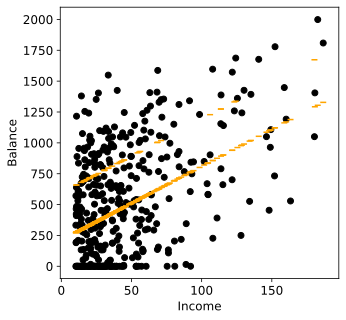

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(Credit.Income,Credit.Balance,marker='o',color='black')
plt.scatter(Credit.Income,QQ_Regression_Model.fittedvalues,marker='_',color='orange');
plt.xlabel('Income')
plt.ylabel('Balance');